# Analysing Diamonds

In this notebook I'm going to analyse diaomonds using machine learning to for instance calculate their price.

In [1]:
# First some setup
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
import numpy as np
from scipy.stats import sem
import seaborn as sns
import matplotlib.pyplot as plt

random_state = 4235109907 


def evaluate_cross_validation(clf, X, y, K):
    # Create a k-fold cross validation iterator of k=5 folds
    cv = KFold(K, shuffle=True, random_state=random_state)
    # By default the score used is the one returned by score method of the estimator (accuracy)
    scores = []
    for train, test in cv.split(X):
        clf.fit(X.iloc[train], y.iloc[train])
        y_pred = clf.predict(X.iloc[test])
        scores += [metrics.r2_score(y.iloc[test], y_pred)]
    # scores = cross_val_score(clf, X, y, cv=cv)
    print(scores)
    print("Mean score: {0:.3f}".format(np.mean(scores)))
    print("Standard error of the mean: (+/-{0:.3f})".format(sem(scores)))


def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print("Accuracy on training set:")
    print(clf.score(X_train, y_train))
    print("Accuracy on testing set:")
    print(clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print("Classification Report:")
    print(metrics.classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))

In [2]:
# load the data-set

diamonds = pd.read_csv('diamonds.csv', sep=',')
diamonds.columns = ["id", "carat", "cut", "color", "clarity", "depth", "table", "price", "x", "y", "z"]

print(diamonds.dtypes)
diamonds[:10]

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
cut = pd.get_dummies(diamonds['cut'])
color = pd.get_dummies(diamonds['color'])
clarity = pd.get_dummies(diamonds['clarity'])

diamonds_hot = diamonds.join(cut).join(color).join(clarity)
print(diamonds_hot.columns)
diamonds_hot

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z', 'Fair', 'Good', 'Ideal', 'Premium', 'Very Good', 'D',
       'E', 'F', 'G', 'H', 'I', 'J', 'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2',
       'VVS1', 'VVS2'],
      dtype='object')


,id,carat,cut,color,clarity,depth,table,price,x,y,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,...,0,0,0,0,1,0,0,0,0,0
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,...,0,0,0,0,0,0,1,0,0,0
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,...,1,0,0,0,0,0,0,1,0,0
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,...,0,1,0,0,0,1,0,0,0,0
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,...,0,1,0,0,0,0,0,0,0,1
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,...,1,0,0,0,0,0,0,0,1,0
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,...,0,0,0,0,1,0,0,0,0,0
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,...,0,0,0,0,0,0,0,1,0,0
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,...,0,0,0,0,0,0,1,0,0,0


In [4]:
# map cut, color and clarity

diamonds['old_cut'] = diamonds['cut']
diamonds['cut'] = diamonds['cut'].map({
    'Fair': 0,  # worst
    'Good': 1,
    'Very Good': 2,
    'Premium': 3,
    'Ideal': 4  # best
})

diamonds['old_color'] = diamonds['color']
diamonds['color'] = diamonds['color'].map(
    {
        'J': 0,  # worst
        'I': 1,
        'H': 2,
        'G': 3,
        'F': 4,
        'E': 5,
        'D': 6  # best
    }
)

diamonds['old_clarity'] = diamonds['clarity']
diamonds['clarity'] = diamonds['clarity'].map(
    {
        'I3': 0,  # worst
        'I2': 1,
        'I1': 2,
        'SI2': 3,
        'SI1': 4,
        'VS2': 5,
        'VS1': 6,
        'VVS2': 7,
        'VVS1': 8,
        'IF': 9,
        'FL': 10  # best
    }
)

diamonds[:10]

,id,carat,cut,color,clarity,depth,table,price,x,y,z,old_cut,old_color,old_clarity
0,1,0.23,4,5,3,61.5,55.0,326,3.95,3.98,2.43,Ideal,E,SI2
1,2,0.21,3,5,4,59.8,61.0,326,3.89,3.84,2.31,Premium,E,SI1
2,3,0.23,1,5,6,56.9,65.0,327,4.05,4.07,2.31,Good,E,VS1
3,4,0.29,3,1,5,62.4,58.0,334,4.20,4.23,2.63,Premium,I,VS2
4,5,0.31,1,0,3,63.3,58.0,335,4.34,4.35,2.75,Good,J,SI2
5,6,0.24,2,0,7,62.8,57.0,336,3.94,3.96,2.48,Very Good,J,VVS2
6,7,0.24,2,1,8,62.3,57.0,336,3.95,3.98,2.47,Very Good,I,VVS1
7,8,0.26,2,2,4,61.9,55.0,337,4.07,4.11,2.53,Very Good,H,SI1
8,9,0.22,0,5,5,65.1,61.0,337,3.87,3.78,2.49,Fair,E,VS2
9,10,0.23,2,2,6,59.4,61.0,338,4.00,4.05,2.39,Very Good,H,VS1


## Analysis
Now the preperation is done, the analysis can begin.  
The dataset fully consists out of numbers and is ready to be trained up on.

First try to calculate the price

In [5]:
y = diamonds['price']
X = diamonds[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
X_hot = diamonds_hot.copy()
del X_hot['color']
del X_hot['cut']
del X_hot['clarity']
del X_hot['price']
del X_hot['id']

### WARNING! Do not run the following block if you do not need to. It takes a long time

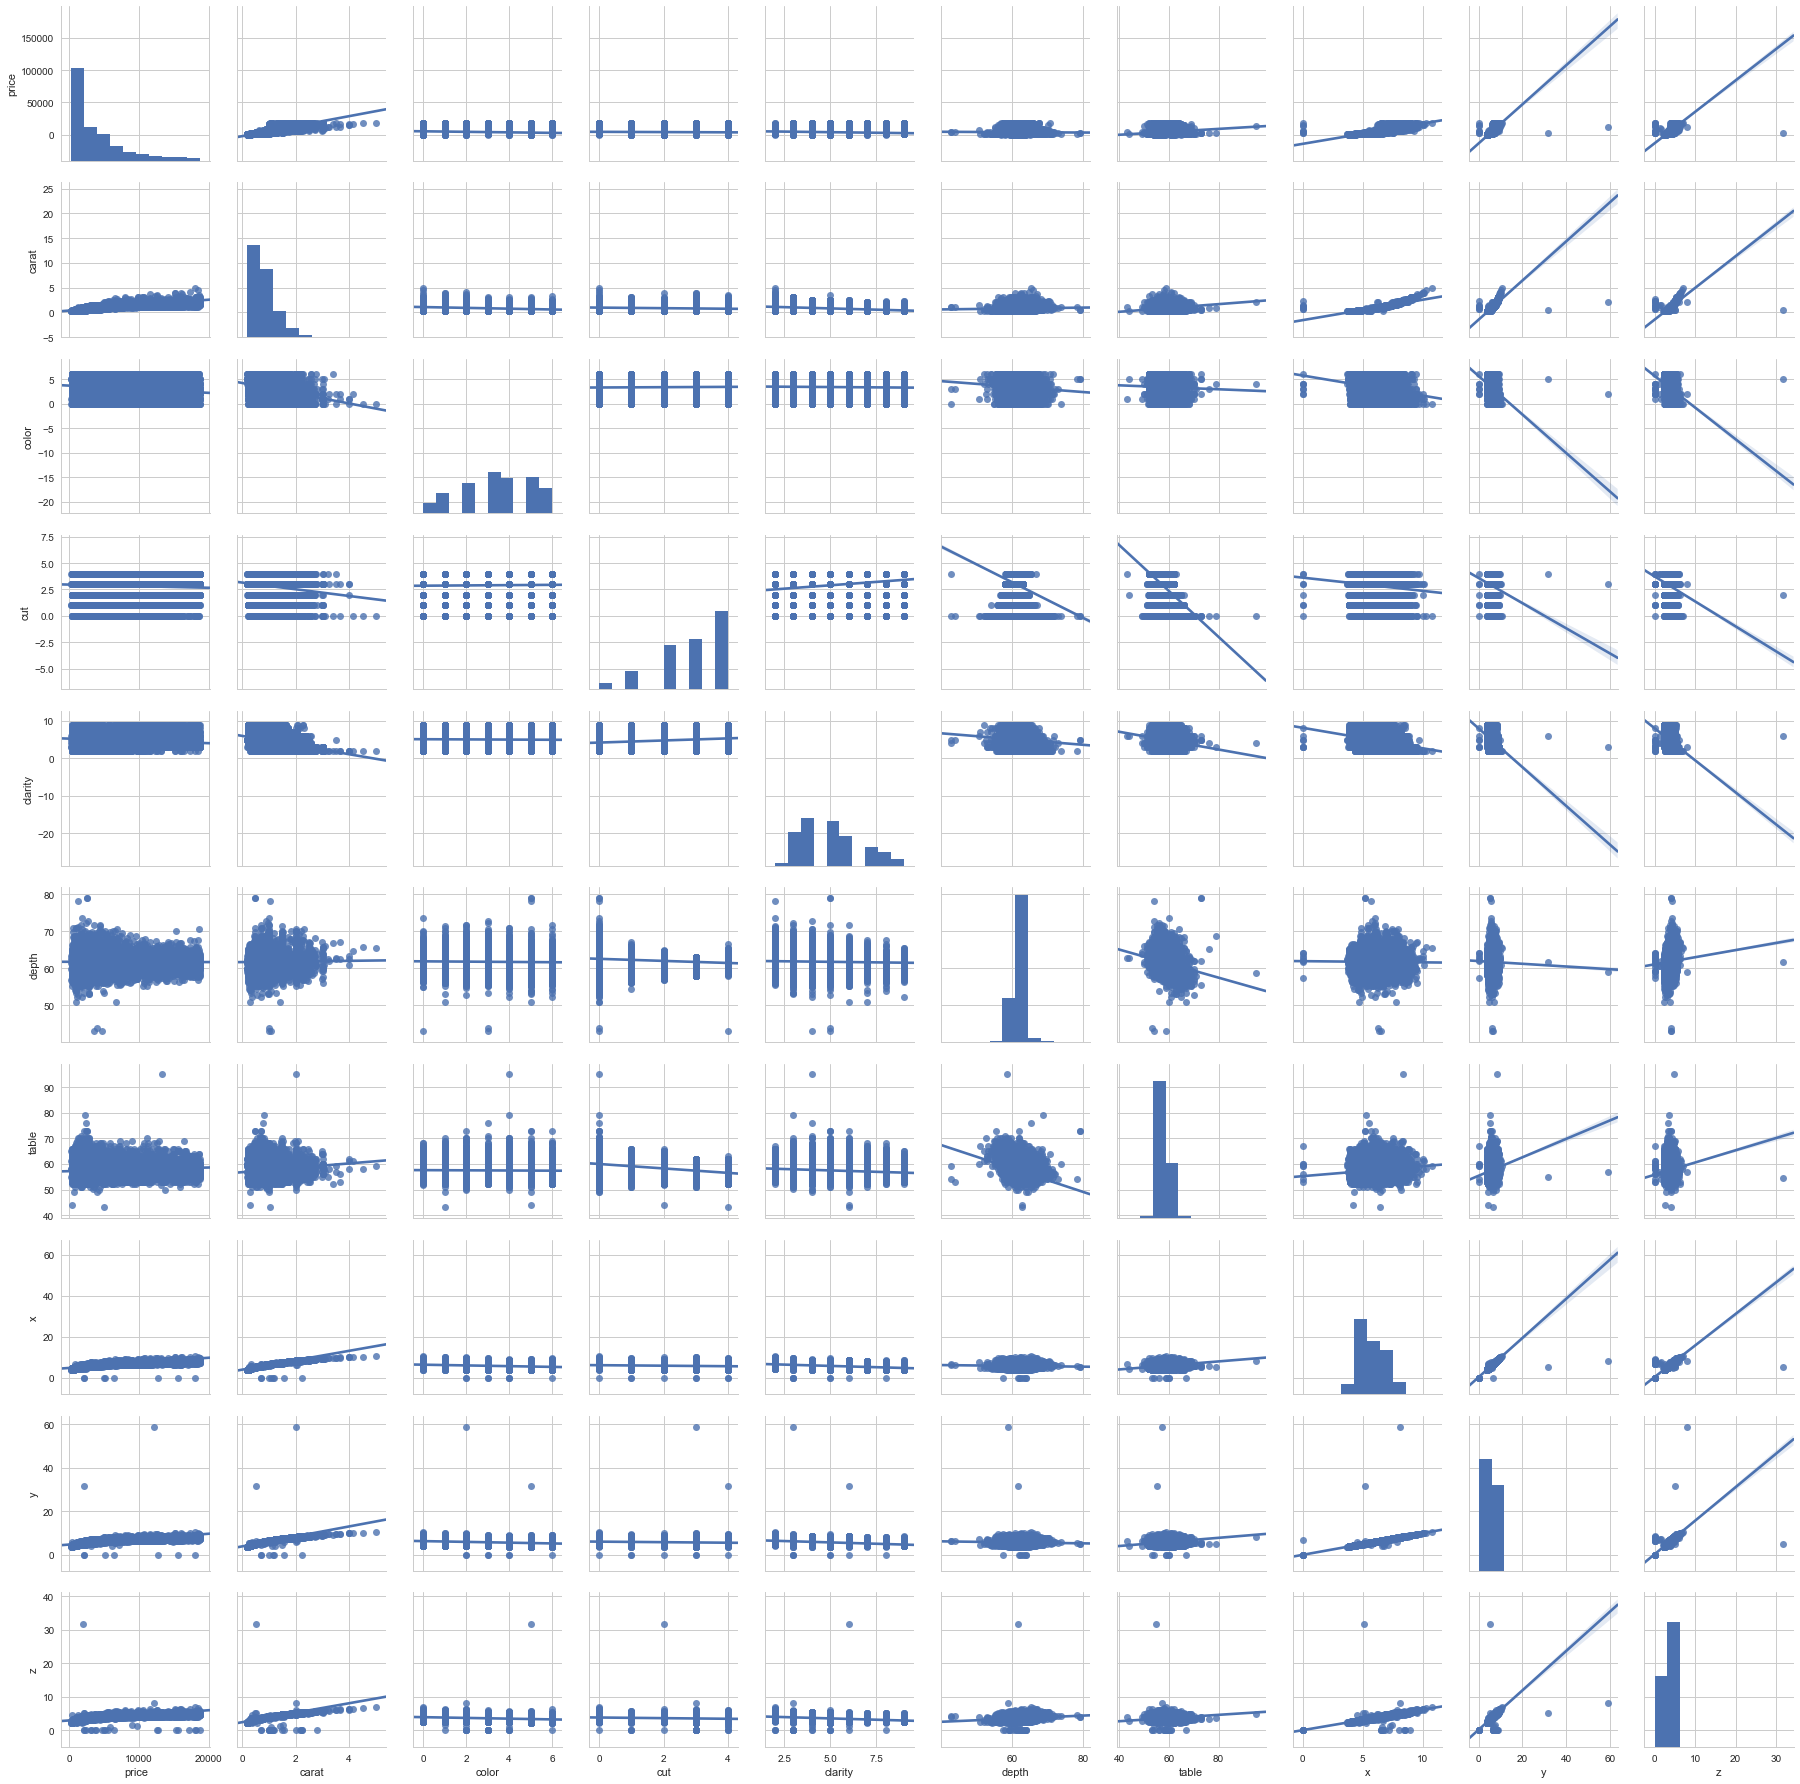

In [6]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(diamonds, kind='reg', vars=['price', 'carat', 'color', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z'], size=2.5)
plt.show()

In the previous graph you can see that carat, x, y and z have the bigest infuence on the price.  
Table and depth do not seem to infuence it.

cut, color and clarity seem to not influence the price on it's own, but maybe combined it does.  
Let's check!

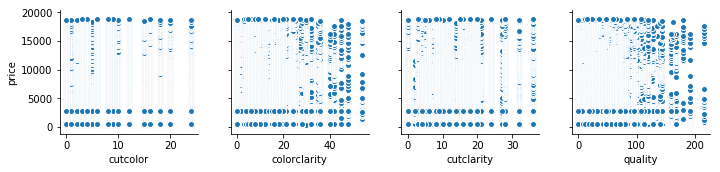

In [32]:
diamonds['quality'] = diamonds['cut'] * diamonds['color'] * diamonds['clarity']
diamonds['cutcolor'] = diamonds['cut'] * diamonds['color']
diamonds['colorclarity'] = diamonds['color'] * diamonds['clarity']
diamonds['cutclarity'] = diamonds['cut'] * diamonds['clarity']

plt.clf()
sns.pairplot(diamonds, kind='scatter', x_vars=['cutcolor', 'colorclarity', 'cutclarity', 'quality'], y_vars=['price'], size=2.5)
plt.show()

# Correlation
x, y and z seem to be coralated to carat, as they should be.  
Carat is the weight of the diamond, and that is relative to it's size.

What is weird is that table and depth are not realy correlated, while they are derrived from x, y and z.

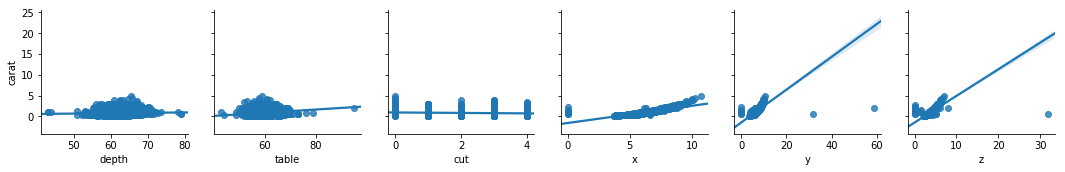

In [7]:
plt.clf()
sns.pairplot(diamonds, kind='reg', x_vars=['depth', 'table', 'cut', 'x', 'y', 'z'], y_vars=['carat'], size=2.5)
plt.show()

# Let's test a discision tree

As a dicsision tree seems to be the best option because of how diamonds are priced.  
See for instance http://www.diamonds.net/Prices/RapaportPriceGuide.aspx


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

In [7]:
# example of GirdSearchCV used to find the best parameters:
gs = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy'), 
                  {'max_depth': np.arange(22, 27), 'min_samples_leaf': np.arange(3, 7)})
gs.fit(X_train, y_train)

print(gs.best_params_)

NameError: name 'tree' is not defined

In [58]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=24, min_samples_leaf=5)

evaluate_cross_validation(clf, X, y, 5)

pred_y = clf.predict(X)

[0.88270889300088684, 0.87925622204596121, 0.89525336179142556, 0.88349699307889984, 0.8924602399886411]
Mean score: 0.887
Standard error of the mean: (+/-0.003)


An accuracy of at least 88%, that's amazing!  
But a 89% accuracy for a price is not the best.  
Let's see what the actual predictions are:

In [59]:
total = X.copy()
total['actual'] = y
total['predict'] = pred_y
total['delta'] = (y - pred_y).abs()
print(total['delta'].describe())
total[:20]

count    53940.000000
mean       538.568687
std       1125.205028
min          0.000000
25%          0.000000
50%        113.000000
75%        514.000000
max      13486.000000
Name: delta, dtype: float64


,carat,cut,color,clarity,depth,table,x,y,z,actual,predict,delta
0,0.23,4,5,3,61.5,55.0,3.95,3.98,2.43,326,498,172
1,0.21,3,5,4,59.8,61.0,3.89,3.84,2.31,326,386,60
2,0.23,1,5,6,56.9,65.0,4.05,4.07,2.31,327,357,30
3,0.29,3,1,5,62.4,58.0,4.20,4.23,2.63,334,429,95
4,0.31,1,0,3,63.3,58.0,4.34,4.35,2.75,335,465,130
5,0.24,2,0,7,62.8,57.0,3.94,3.96,2.48,336,449,113
6,0.24,2,1,8,62.3,57.0,3.95,3.98,2.47,336,449,113
7,0.26,2,2,4,61.9,55.0,4.07,4.11,2.53,337,394,57
8,0.22,0,5,5,65.1,61.0,3.87,3.78,2.49,337,352,15
9,0.23,2,2,6,59.4,61.0,4.00,4.05,2.39,338,357,19


The distance between the acutal and the prediction is sometimes prety close.  
But often it is quite a ways away. On avarage 0 or 50 difference, the maximum delta was more than 13.000 euro difference!  
Let's try something else then.

# Random Forest
Looking around on Kaggle, Random Forest seems to have good results.  
Let's see if we can reproduce that.

_I tried to use GirdSearch on this one, but it took increadibly long and didn't even finish._

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=24, n_estimators=10, min_samples_leaf=5, random_state=random_state)

evaluate_cross_validation(rf_clf, X_hot, y, 5)

[0.91833352202462182, 0.92374960164647224, 0.92280859558145512, 0.92494958547909689, 0.92027124079920397]
Mean score: 0.922
Standard error of the mean: (+/-0.001)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

rf_clf.fit(X_train, y_train)

pred_y = rf_clf.predict(X_test)

total = X_test.copy()
total['actual'] = y_test
total['predict'] = pred_y
total['delta'] = (y_test - pred_y).abs()
print(total['delta'].describe())
total[:20]

count    13485.000000
mean       529.370337
std       1021.821397
min          0.000000
25%         50.000000
50%        170.000000
75%        519.000000
max      14693.000000
Name: delta, dtype: float64


,carat,cut,color,clarity,depth,table,x,y,z,actual,predict,delta
9890,0.90,2,2,6,63.6,55.0,6.15,6.11,3.90,4685,4224,461
4473,0.70,2,5,9,63.4,58.0,5.64,5.59,3.56,3622,2695,927
18629,1.02,3,3,7,62.2,60.0,6.39,6.43,3.99,7602,7724,122
5262,0.90,4,2,3,62.3,57.0,6.16,6.19,3.85,3794,3160,634
45443,0.70,2,1,3,63.2,60.0,5.62,5.55,3.53,1672,1775,103
20920,1.18,3,3,7,61.6,58.0,6.77,6.80,4.18,9137,9289,152
51761,0.53,4,6,7,62.2,56.0,5.19,5.23,3.24,2407,1857,550
2922,0.91,1,1,5,64.2,55.0,6.13,6.09,3.92,3287,2854,433
1362,1.50,0,2,2,65.6,54.0,7.26,7.09,4.70,2964,7056,4092
46939,0.52,4,5,5,61.8,55.0,5.19,5.17,3.20,1815,1815,0


In my oppinion the results of the normal Dision Tree where closer.  
It sometimes is very accurate, but often is way off.  
The percentiles are further off than the Decision Tree was. And the maximum is even furhter off.  
But the accuracy score is better than the Decision Tree, and you can see this in the mean and std.

# Neural network
Let's give them a try: 
Persistance scripts at the bottom


_I have tried many different Neural Network structures. But the simple two layer dense network seems to work best._

In [12]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from scipy import io
from keras.utils import np_utils

from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.wrappers.scikit_learn import KerasRegressor

from keras_sequential_ascii import sequential_model_to_ascii_printout
from live_loss_plot import PlotLosses

# Keras layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.layers import Dropout, BatchNormalization

np.random.seed(random_state)

plot_losses = PlotLosses(figsize=(12, 6))

Using TensorFlow backend.


In [45]:
def get_model(X):
    def get_inner_model():
        model = Sequential()
        model.add(Dense(units=len(X.columns) * 2, input_dim=len(X.columns), activation='relu'))
        # model.add(BatchNormalization())
        model.add(Dense(units=len(X.columns), activation='relu'))
        # model.add(Dense(units=8, activation='relu'))
        # model.add(Dense(units=128, activation='relu'))
        # model.add(Dense(units=128, activation='relu'))
        # model.add(Dense(units=32, activation='relu'))
        # model.add(Dense(units=16, activation='relu'))
        # model.add(Dropout(0.4))
        model.add(Dense(units=1, activation='linear'))
    
        model.compile(loss='mean_squared_error', optimizer='nadam')
        return model
    return get_inner_model


In [64]:
# Generate train and test data with hot encoding.
# Scale the X axes
X_train, X_test, y_train, y_test = train_test_split(X_hot, y, random_state=random_state)
sc = StandardScaler()
sc.fit(X_test, y_test)
X_tests = sc.transform(X_test)


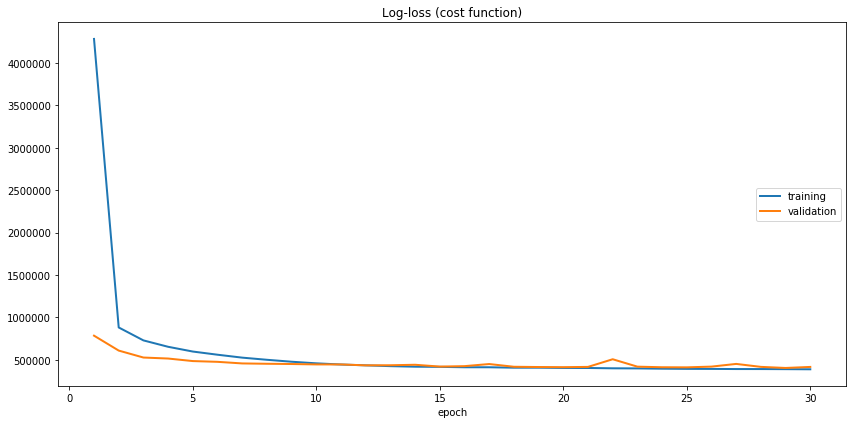

40455/40455 [==============================] - 5s 131us/step - loss: 388324.7276 - val_loss: 416064.7293


Pipeline(memory=None,
     steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', <keras.wrappers.scikit_learn.KerasRegressor object at 0x7f84a7e76630>)])

In [47]:
estimators = [
    ('standardize', StandardScaler()),
    ('mlp', KerasRegressor(build_fn=get_model(X_hot), epochs=30, batch_size=16, validation_data=(X_tests, y_test), callbacks=[plot_losses]))
    ]

pipeline = Pipeline(estimators)

np.random.seed(random_state)
pipeline.fit(X_train, y_train)


In [65]:
y_pred = pipeline.predict(X_test)

total = X_test.copy()
total['actual'] = y_test
total['predict'] = y_pred
total['delta'] = (y_test - y_pred).abs()
total

,carat,depth,table,x,y,z,Fair,Good,Ideal,Premium,...,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,actual,predict,delta
9890,0.90,63.6,55.0,6.15,6.11,3.90,0,0,0,0,...,0,0,0,1,0,0,0,4685,4272.060059,412.939941
4473,0.70,63.4,58.0,5.64,5.59,3.56,0,0,0,0,...,1,0,0,0,0,0,0,3622,5606.863770,1984.863770
18629,1.02,62.2,60.0,6.39,6.43,3.99,0,0,0,1,...,0,0,0,0,0,0,1,7602,6884.946777,717.053223
5262,0.90,62.3,57.0,6.16,6.19,3.85,0,0,1,0,...,0,0,1,0,0,0,0,3794,3350.237305,443.762695
45443,0.70,63.2,60.0,5.62,5.55,3.53,0,0,0,0,...,0,0,1,0,0,0,0,1672,1868.628418,196.628418
20920,1.18,61.6,58.0,6.77,6.80,4.18,0,0,0,1,...,0,0,0,0,0,0,1,9137,9317.750000,180.750000
51761,0.53,62.2,56.0,5.19,5.23,3.24,0,0,1,0,...,0,0,0,0,0,0,1,2407,2573.148438,166.148438
2922,0.91,64.2,55.0,6.13,6.09,3.92,0,1,0,0,...,0,0,0,0,1,0,0,3287,3439.529785,152.529785
1362,1.50,65.6,54.0,7.26,7.09,4.70,1,0,0,0,...,0,0,0,0,0,0,0,2964,4412.921387,1448.921387
46939,0.52,61.8,55.0,5.19,5.17,3.20,0,0,1,0,...,0,0,0,0,1,0,0,1815,1700.975708,114.024292


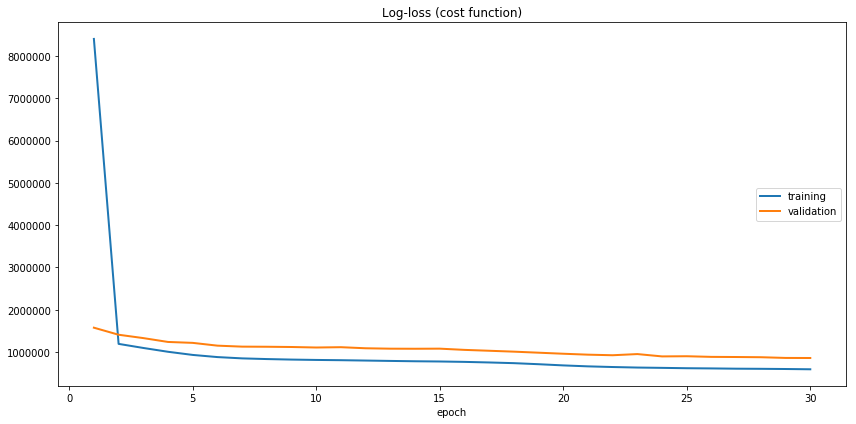

40455/40455 [==============================] - 5s 129us/step - loss: 592038.1921 - val_loss: 858666.0700


,carat,cut,color,clarity,depth,table,x,y,z,actual,predict,delta
10289,1.03,3,5,3,61.8,59.0,6.42,6.47,3.98,4758,4091.969727,666.030273
49884,0.70,3,3,3,61.1,60.0,5.67,5.62,3.45,2177,1831.353149,345.646851
7428,0.72,4,4,9,62.0,57.0,5.71,5.78,3.56,4228,4956.297852,728.297852
9821,1.01,3,3,4,61.0,62.0,6.49,6.40,3.93,4672,4787.171875,115.171875
17140,1.00,2,4,5,63.8,56.9,6.29,6.36,4.04,6841,5937.097656,903.902344
2788,0.81,4,2,6,61.8,58.0,5.97,6.04,3.71,3257,3280.477051,23.477051
33857,0.30,3,5,5,60.0,60.0,4.40,4.36,2.63,844,731.718567,112.281433
40251,0.60,4,1,3,62.2,54.0,5.40,5.44,3.37,1125,1333.557373,208.557373
15843,1.31,4,1,5,62.4,57.0,6.93,6.97,4.34,6338,6913.387207,575.387207
29712,0.31,1,2,8,63.3,56.0,4.30,4.32,2.73,707,698.235229,8.764771


In [17]:
# Without hot encoding
X_train, X_test, y_train, y_test = train_test_split(X, y)
sc = StandardScaler()
sc.fit(X_test, y_test)
X_tests = sc.transform(X_test)

estimators = [
    ('standardize', StandardScaler()),
    ('mlp', KerasRegressor(build_fn=get_model(X), epochs=30, batch_size=16, validation_data=(X_tests, y_test), callbacks=[plot_losses]))
    ]

pipeline = Pipeline(estimators)

np.random.seed(random_state)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

total = X_test.copy()
total['actual'] = y_test
total['predict'] = y_pred
total['delta'] = (y_test - y_pred).abs()
total

Hot encoding seems to perform a lot better on neural networks.  
But unfortunatly it still has trouble finding the right price. Often it is about 100 euro's off.

count    13485.000000
mean       319.976172
std        532.847394
min          0.033203
25%         59.547974
50%        141.654053
75%        333.854248
max       7022.027344
Name: delta, dtype: float64


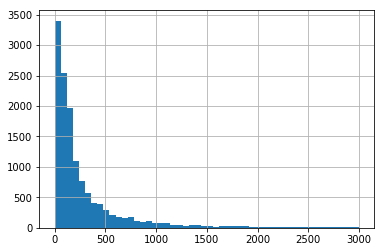

0.975264027721


In [66]:
import pandas as pd
sr = total['delta']  # type: pd.Series
print(sr.describe())
sr.hist(bins=50, range=[0, 3000])
plt.show()
print(metrics.r2_score(y_test, y_pred))

In [50]:
p200 = sr[sr > 200].count()
m200 = sr[sr <= 200].count()

m200 / (m200 + p200)

0.62350760103819058

Aproximatly 62% is accurate within 200 euro's

# persistent model
Instead of the above. You can run the following code to save or load the trained model to save time.

In [51]:
# save model
pipeline.named_steps['mlp'].model.save('mlp.hd5')
pipeline.named_steps['mlp'].model = None
pipeline.named_steps['mlp'].build_fn = None

joblib.dump(pipeline, 'mlp.pkl')

del pipeline

In [53]:
# load model
import keras.models
pipeline = joblib.load('mlp.pkl')
pipeline.named_steps['mlp'].model = keras.models.load_model('mlp.hd5')

# Combining Results
I'm going to combine the results of the regression methods into one result and measure it's accuracy.  
Since I'm using both hot encoding and enumeration I cannot use known tools.  
I will be manually combining the results and measure the accuracy.

In [67]:
hot_regressors = [pipeline]
enum_regressors = [rf_clf, clf]

hot_ys = [r.predict(X_hot) for r in hot_regressors]
enum_ys = [r.predict(X) for r in enum_regressors]

In [68]:
ysdf = pd.DataFrame({'df%d' % ind: it for ind, it in enumerate(hot_ys + enum_ys)})
ysdf['avg'] = ysdf.mean(axis=1)
ysdf['act'] = y
ysdf['delta'] = (ysdf['avg'] - ysdf['act']).abs()
ysdf

,df0,df1,df2,avg,act,delta
0,279.359131,326,498,367.786377,326,41.786377
1,449.358337,326,386,387.119446,326,61.119446
2,376.513245,373,357,368.837748,327,41.837748
3,547.478333,473,429,483.159444,334,149.159444
4,578.604797,523,465,522.201599,335,187.201599
5,201.548462,432,449,360.849487,336,24.849487
6,446.009857,449,449,448.003286,336,112.003286
7,371.362793,418,394,394.454264,337,57.454264
8,557.926086,373,352,427.642029,337,90.642029
9,391.642181,402,357,383.547394,338,45.547394


count    53940.000000
mean       310.300776
std        583.168516
min          0.003825
25%         35.200928
50%         98.087484
75%        307.744548
max      11824.824178
Name: delta, dtype: float64


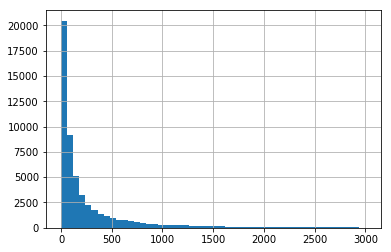

0.968978318971


In [69]:
import pandas as pd
sr = ysdf['delta']  # type: pd.Series
print(sr.describe())
sr.hist(bins=50, range=[0, 3000])
plt.show()
print(metrics.r2_score(ysdf['avg'], ysdf['act']))

In [57]:
p200 = sr[sr > 200].count()
m200 = sr[sr <= 200].count()

m200 / (m200 + p200)

0.66523915461624028

# Comparing the combined to only Neural Networks
| item  | Neural         | Combined       |
|-------|---------------:|---------------:|
| count | `13485.000000` | `53940.000000` |
| mean  | `325.122057`   | `310.300776`   |
| std   | `543.185135`   | `583.168516`   |
| min   | `0.000427`     | `0.003825`     |
| 25%   | `60.877319`    | `35.200928`    |
| 50%   | `140.738708`   | `98.087484`    |
| 75%   | `339.591797`   | `307.744548`   |
| max   | `6495.046875`  | `11824.824178` |

You can see a lot of the values improved.  
The mean delta went from 325 to 307, and all percentiles went down.  
The only problem is that the maximum delta went up. from ~6500 to ~12000. That is almost double the original.  

When looking at the graph. Most values seem to be way more accurate.  
The 0 to 20 bar was only upto ~3000/~13000=~22% before and now it is at ~20.000/~54000=~37% which is a very large increase!

Also now up to 66% of the results are accurate within 200 euro's, where before it was 62%. A marginal increase, but notisable.

The r2_score actually went down a bit (0.5%). But the percentiles have improved quite a bit.  
Because of these percentiles I think the combined average is actually better than just de Neural Network.

# Real Calculation

The real calculation of the price of an diamond is calculated using the Rapaport table.  
In this table you can lookup the diamond using it's color and clarity.    
You get a value that is in 100's of USD. You multiply this value by the carat of the diamond.  
There are many Rapaport tables, and you select one by checking the cut and shape of the diamond.


source: http://www.info-diamond.com/polished/calculate-diamond-prices.html